https://github.com/jupyter/notebook/issues/2287

incase you run into an issue with running the code due to exceeding run rate (?)

In [1]:
# imports for database connection
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

# import these to view table column headers & rows
from sqlalchemy.orm import sessionmaker
from sqlalchemy import select

# Import the dependencies for analysis
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
# UPDATE PATH ONCE FINAL ANALYSIS FILE IS COMPILED
engine = create_engine("sqlite:///../../Resources/covid_db.db")

In [3]:
# reflect an existing database into a new model (creates base class for automap schema)
Base = automap_base()

In [4]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['covid_stats', 'government_regulation']

In [6]:
# save references to each table
covid_stats = Base.classes.covid_stats
government_regulation = Base.classes.government_regulation

In [7]:
# Create session (link) from Python to the database
session = sessionmaker(bind=engine)()

In [8]:
# Merge covid_stats_table with government regulation_table
joined = session.query(covid_stats.primary_key_reaction,\
                        covid_stats.date_updated,\
                        covid_stats.iso_code,\
                        covid_stats.continent,\
                        covid_stats.location,\
                        covid_stats.population,\
                        covid_stats.population_density,\
                        covid_stats.median_age,\
                        covid_stats.new_cases,\
                        covid_stats.percentage_of_Pop_New_Cases,\
                        covid_stats.new_deaths,\
                        covid_stats.percentage_of_Pop_New_Deaths,\
                        covid_stats.new_tests,\
                        covid_stats.percentage_of_Pop_New_Tests,\
                        covid_stats.total_cases_updated,\
                        covid_stats.percentage_of_Pop_Total_Cases,\
                        covid_stats.total_deaths_updated,\
                        covid_stats.percentage_of_Pop_Total_Deaths,\
                        covid_stats.total_tests_updated,\
                        covid_stats.percentage_of_Pop_Total_Tests,\
                       government_regulation.primary_key_response,\
                       government_regulation.StringencyIndex_updated,\
                       government_regulation.percentage_change_stringency,\
                       government_regulation.StringencyLegacyIndex_updated,\
                       government_regulation.GovernmentResponseIndex_updated,\
                       government_regulation.percentage_change_GovernmentResponse,\
                       government_regulation.ContainmentHealthIndex_updated,\
                       government_regulation.percentage_change_ContainmentHealth,\
                       government_regulation.EconomicSupportIndex_updated,\
                       government_regulation.percentage_change_EconomicSupport)\
        .join(government_regulation,government_regulation.primary_key_response == covid_stats.primary_key_reaction)

# save the query results as a Pandas DataFrame and set the index
merged_covid_df = pd.DataFrame(joined, columns=['primary_key_reaction',
                                             'date_updated',
                                             'iso_code',
                                             'continent',
                                             'location',
                                             'population',
                                             'population_density',
                                             'median_age',
                                             'new_cases',
                                             'percentage_of_Pop_New_Cases',
                                             'new_deaths',
                                             'percentage_of_Pop_New_Deaths',
                                             'new_tests',
                                             'percentage_of_Pop_New_Tests',
                                             'total_cases_updated',
                                             'percentage_of_Pop_Total_Cases',
                                             'total_deaths_updated',
                                             'percentage_of_Pop_Total_Deaths',
                                             'total_tests_updated',
                                             'percentage_of_Pop_Total_Tests',
                                             'primary_key_response',
                                             'StringencyIndex_updated',
                                             'percentage_change_stringency',
                                             'StringencyLegacyIndex_updated',
                                             'GovernmentResponseIndex_updated',
                                             'percentage_change_GovernmentResponse',
                                             'ContainmentHealthIndex_updated',
                                             'percentage_change_ContainmentHealth',
                                             'EconomicSupportIndex_updated',
                                             'percentage_change_EconomicSupport'
                                             ])

In [9]:
# preview 
merged_covid_df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,...,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,...,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,...,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,...,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


### Trying to create a charts that shows shows historicals for index, cases, deaths, and tests

In [10]:
# Create new Dataframe filtered for Canada
canada_df = pd.DataFrame(merged_covid_df.loc[merged_covid_df["location"]=="Canada"].reset_index())
canada_df = canada_df.drop(["index"],axis=1)
# canada_df

In [11]:
# Create new Dataframe filtered for USA
usa_df = pd.DataFrame(merged_covid_df.loc[merged_covid_df["location"]=="United States"].reset_index())
usa_df = usa_df.drop(["index"],axis=1)
# usa_df

In [12]:
# Set up all x and y axis for Canada
x_axis = canada_df["date_updated"]

y_axis = canada_df["StringencyIndex_updated"]
y_axis1 = canada_df["total_cases_updated"]
y_axis2 = canada_df["total_tests_updated"]
y_axis3 = canada_df["total_deaths_updated"]
y_axis4 = canada_df["new_cases"]
y_axis5 = canada_df["new_tests"]
y_axis6 = canada_df["new_deaths"]

In [13]:
# Set up all x and y axis for USA
x_axis0 = usa_df["date_updated"]

y_axis0 = usa_df["StringencyIndex_updated"]
y_axis01 = usa_df["total_cases_updated"]
y_axis02 = usa_df["total_tests_updated"]
y_axis03 = usa_df["total_deaths_updated"]
y_axis04 = usa_df["new_cases"]
y_axis05 = usa_df["new_tests"]
y_axis06 = usa_df["new_deaths"]

Text(0.5, 1.0, 'Stringency Index by Day - CANADA')

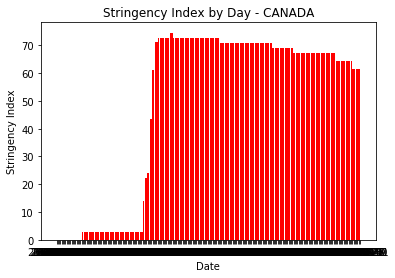

In [14]:
# Create the plot - canada
plt.bar(x_axis, y_axis, color="red", label="Stringency Index")

# Create labels for the x and y axis
plt.xlabel("Date")
plt.ylabel("Stringency Index")

# Create a title
plt.title("Stringency Index by Day - CANADA")

Text(0.5, 1.0, 'Stringency Index by Day - USA')

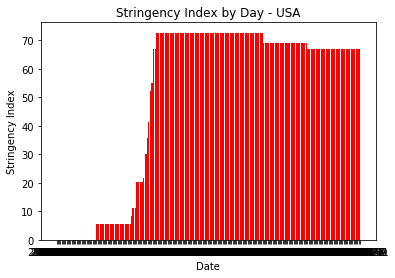

In [15]:
# Create the plot - usa
plt.bar(x_axis0, y_axis0, color="red", label="Stringency Index")

# Create labels for the x and y axis
plt.xlabel("Date")
plt.ylabel("Stringency Index")

# Create a title
plt.title("Stringency Index by Day - USA")

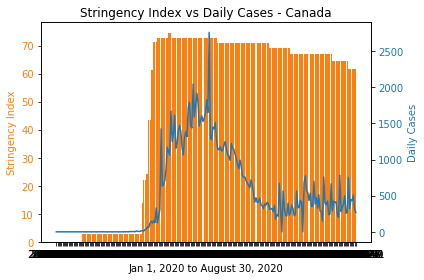

In [16]:
# Create comparison plot - index vs daily cases
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Jan 1, 2020 to August 30, 2020')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis, y_axis, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Daily Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y_axis4, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Stringency Index vs Daily Cases - Canada")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

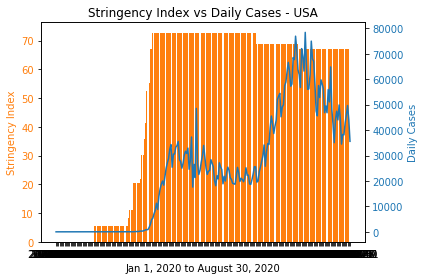

In [17]:
# Create comparison plot - index vs daily cases
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Jan 1, 2020 to August 30, 2020')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis, y_axis0, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Daily Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y_axis04, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Stringency Index vs Daily Cases - USA")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# interesting to note that when daily cases increase, stringency decreases

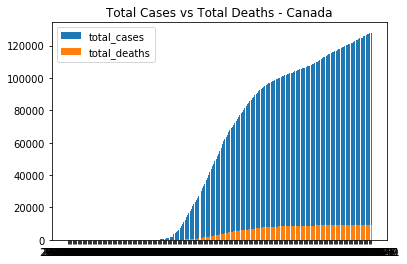

In [18]:
# Create the stacked bar chart - Canada
p1 = plt.bar(x_axis, y_axis1)
p2 = plt.bar(x_axis, y_axis3)

plt.title("Total Cases vs Total Deaths - Canada")

plt.legend(["total_cases", "total_deaths"])

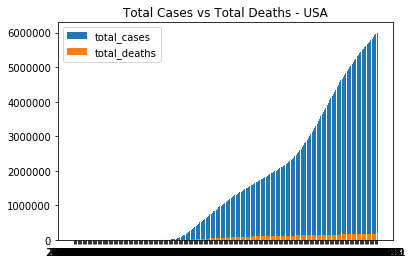

In [19]:
# Create the stacked bar chart - USA
p01 = plt.bar(x_axis, y_axis01)
p02 = plt.bar(x_axis, y_axis03)

plt.title("Total Cases vs Total Deaths - USA")

plt.legend(["total_cases", "total_deaths"])

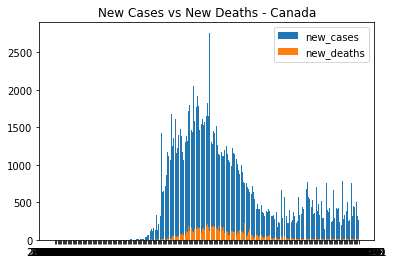

In [20]:
# Plot daily amounts for cases, deaths - Canada
p4 = plt.bar(x_axis, y_axis4)
p5 = plt.bar(x_axis, y_axis6)

plt.title("New Cases vs New Deaths - Canada")

plt.legend(["new_cases", "new_deaths"])

Text(0.5, 1.0, 'New Deaths - Canada')

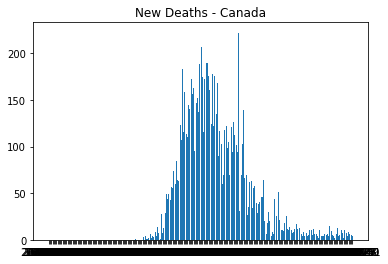

In [21]:
# Plot daily amounts for deaths - Canada
plt.bar(x_axis, y_axis6)

plt.title("New Deaths - Canada")

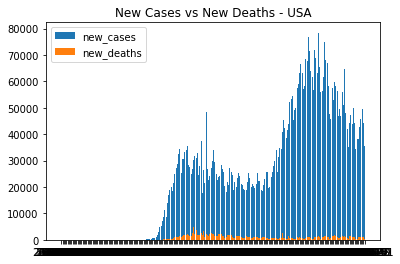

In [22]:
# Plot daily amounts for cases, deaths - Usa
p04 = plt.bar(x_axis, y_axis04)
p05 = plt.bar(x_axis, y_axis06)

plt.title("New Cases vs New Deaths - USA")

plt.legend(["new_cases", "new_deaths"])

Text(0.5, 1.0, 'New Deaths - USA')

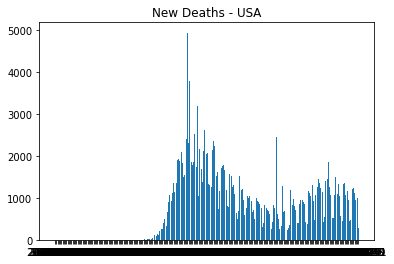

In [23]:
# Plot daily amounts for deaths - Usa
plt.bar(x_axis, y_axis06)

plt.title("New Deaths - USA")

### Trying to add a new column that calculates percentage change with strigency index

In [24]:
# Set the x-axis to a date_updated and y-axis to percentage change for Canada
x_axis = canada_df["date_updated"]
y_axis = canada_df["percentage_change_stringency"]

In [25]:
# Set the x-axis to a date_updated and y-axis to percentage change for USA
x_axis0 = usa_df["date_updated"]
y_axis0 = usa_df["percentage_change_stringency"]

Text(0.5, 1.0, 'Stringency Index Percentage Change - Canada')

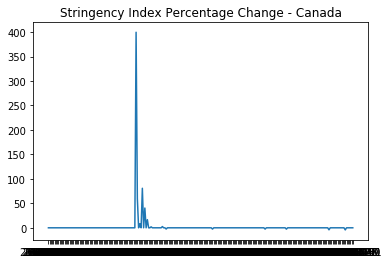

In [26]:
# Plot daily percentage change for stringency index - CANADA
plt.plot(x_axis , y_axis)

plt.title("Stringency Index Percentage Change - Canada")

Text(0.5, 1.0, 'Stringency Index Percentage Change - USA')

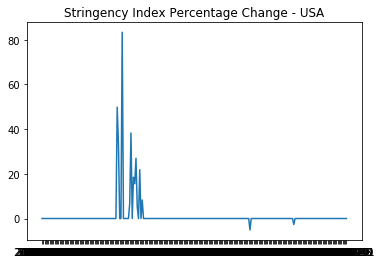

In [27]:
# Plot daily percentage change for stringency index - USA
plt.plot(x_axis0 , y_axis0)

plt.title("Stringency Index Percentage Change - USA")

### Will filter for the days that have material changes in policy

In [28]:
# Filter based on percentage changes greater than 10% or any decrease in policy - USA
new_canada_GT10 = canada_df.loc[(canada_df.percentage_change_stringency > 10) | (canada_df.percentage_change_stringency < 0)]

In [29]:
# Set the x-axis to a date_updated and y-axis to percentage change for Canada
x_axis = new_canada_GT10["date_updated"]
y_axis = new_canada_GT10["percentage_change_stringency"]

Text(0.5, 1.0, 'Material (+10% or <0%) Stringency Index Percentage Change - Canada')

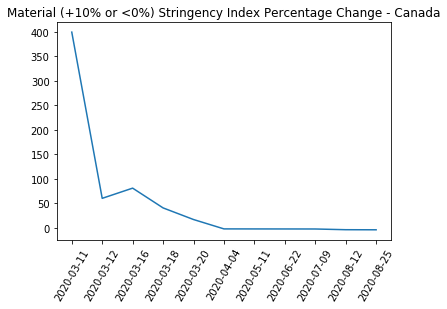

In [30]:
# Plot material percentage change for stringency index - CANADA
plt.plot(x_axis , y_axis)

plt.xticks(rotation=60)

plt.title("Material (+10% or <0%) Stringency Index Percentage Change - Canada")

In [31]:
# Filter based on percentage changes greater than 10% or any decrease in policy - USA
new_usa_GT10 = usa_df.loc[(usa_df.percentage_change_stringency > 10) | (usa_df.percentage_change_stringency < 0)]

In [32]:
# Set the x-axis to a date_updated and y-axis to percentage change for USA
x_axis0 = new_usa_GT10["date_updated"]
y_axis0 = new_usa_GT10["percentage_change_stringency"]

Text(0.5, 1.0, 'Material (+10% or <0%) Stringency Index Percentage Change - USA')

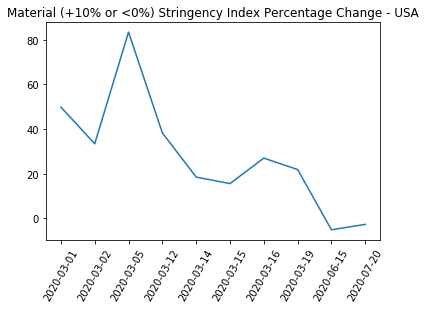

In [33]:
# Plot material percentage change for stringency index - USA
plt.plot(x_axis0 , y_axis0)

plt.xticks(rotation=60)

plt.title("Material (+10% or <0%) Stringency Index Percentage Change - USA")

### Trying to calculate percentages of population for existing metrics
notes:
- total tests doesn't mean one test per person only, so % of population isn't necessarily accurate
- total cases could include those who caught it a second time, though I'd imagine that is a very small number of people
- total deaths % of population isn't accurate either as the population amount doesn't change, implying daily birth and death isn't be captured in total population - assume the amounts generally net eachother out, or go off the general population trend of country

In [34]:
# Set the x-axis to a date_updated and y-axis to % of Population - NEW - CANADA
x_axis1 = canada_df["date_updated"]
y_axis1 = canada_df["percentage_of_Pop_New_Tests"]

x_axis2 = canada_df["date_updated"]
y_axis2 = canada_df["percentage_of_Pop_New_Cases"]

x_axis3 = canada_df["date_updated"]
y_axis3 = canada_df["percentage_of_Pop_New_Deaths"]

In [35]:
# Set the x-axis to a date_updated and y-axis to % of Population - TOTALS - CANADA
x_axis4 = canada_df["date_updated"]
y_axis4 = canada_df["percentage_of_Pop_Total_Tests"]

x_axis5 = canada_df["date_updated"]
y_axis5 = canada_df["percentage_of_Pop_Total_Cases"]

x_axis6 = canada_df["date_updated"]
y_axis6 = canada_df["percentage_of_Pop_Total_Deaths"]

Text(0.5, 1.0, '% of Population - NEW Tests - CANADA')

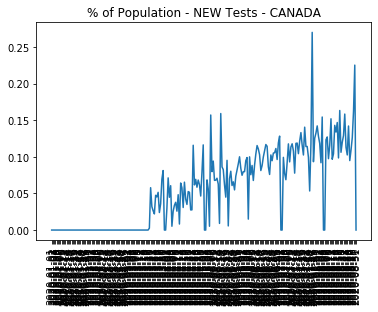

In [36]:
# Plot % of Population - NEW - CANADA
plt.plot(x_axis1, y_axis1)

plt.xticks(rotation=90)

plt.title("% of Population - NEW Tests - CANADA")

Text(0.5, 1.0, '% of Population - TOTAL Tested - CANADA')

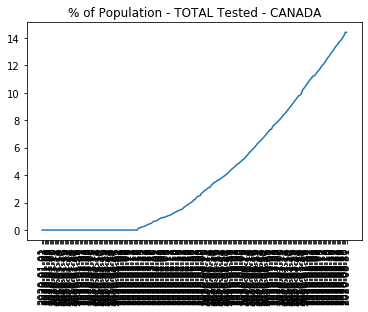

In [37]:
# Plot % of Population - TOTAL - CANADA
plt.plot(x_axis4, y_axis4)

plt.xticks(rotation=90)

plt.title("% of Population - TOTAL Tested - CANADA")

Text(0.5, 1.0, '% of Population - NEW Cases & Deaths - CANADA')

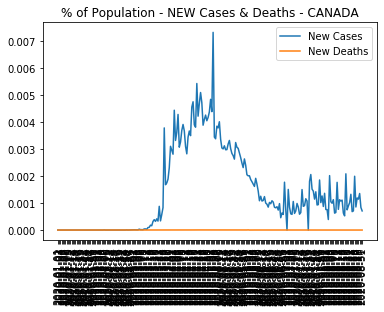

In [38]:
# Plot % of Population - NEW - CANADA
plt.plot(x_axis2, y_axis2, x_axis3, y_axis3)

plt.xticks(rotation=90)

plt.legend(["New Cases", "New Deaths"])

plt.title("% of Population - NEW Cases & Deaths - CANADA")

Text(0.5, 1.0, '% of Population - TOTAL Cases & Deaths - CANADA')

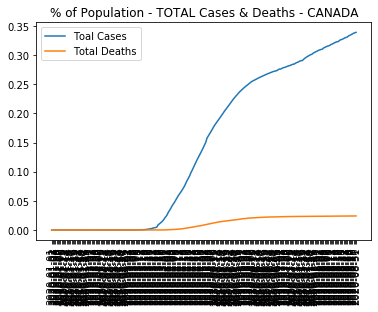

In [39]:
# Plot % of Population - TOTAL - CANADA
plt.plot(x_axis5, y_axis5, x_axis6, y_axis6)

plt.xticks(rotation=90)

plt.legend(["Toal Cases", "Total Deaths"])

plt.title("% of Population - TOTAL Cases & Deaths - CANADA")

In [40]:
# Set the x-axis to a date_updated and y-axis to % of Population - NEW - USA
x_axis01 = usa_df["date_updated"]
y_axis01 = usa_df["percentage_of_Pop_New_Tests"]

x_axis02 = usa_df["date_updated"]
y_axis02 = usa_df["percentage_of_Pop_New_Cases"]

x_axis03 = usa_df["date_updated"]
y_axis03 = usa_df["percentage_of_Pop_New_Deaths"]

In [41]:
# Set the x-axis to a date_updated and y-axis to % of Population - TOTAL - USA
x_axis04 = usa_df["date_updated"]
y_axis04 = usa_df["percentage_of_Pop_Total_Tests"]

x_axis05 = usa_df["date_updated"]
y_axis05 = usa_df["percentage_of_Pop_Total_Cases"]

x_axis06 = usa_df["date_updated"]
y_axis06 = usa_df["percentage_of_Pop_Total_Deaths"]

Text(0.5, 1.0, '% of Population - NEW Tests - USA')

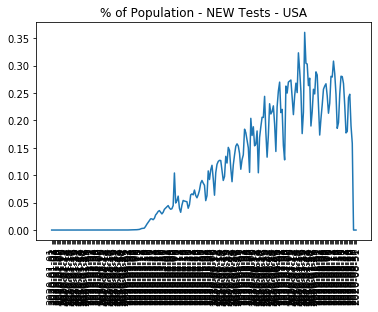

In [42]:
# Plot % of Population - NEW - USA
plt.plot(x_axis01, y_axis01)

plt.xticks(rotation=90)


plt.title("% of Population - NEW Tests - USA")

Text(0.5, 1.0, '% of Population - TOTAL Tests - USA')

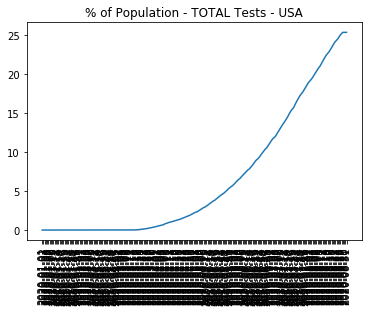

In [43]:
# Plot % of Population - TOTAL - USA
plt.plot(x_axis04, y_axis04)

plt.xticks(rotation=90)


plt.title("% of Population - TOTAL Tests - USA")

Text(0.5, 1.0, '% of Population - NEW Cases & Deaths - USA')

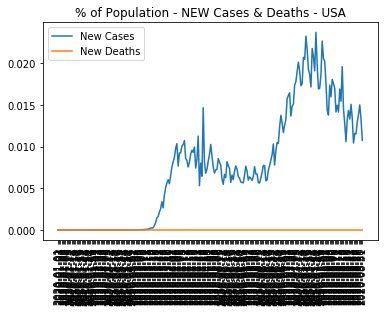

In [44]:
# Plot % of Population - NEW - USA
plt.plot(x_axis02, y_axis02, x_axis03, y_axis03)

plt.xticks(rotation=90)

plt.legend(["New Cases", "New Deaths"])

plt.title("% of Population - NEW Cases & Deaths - USA")

Text(0.5, 1.0, '% of Population - TOTAL Cases & Deaths- USA')

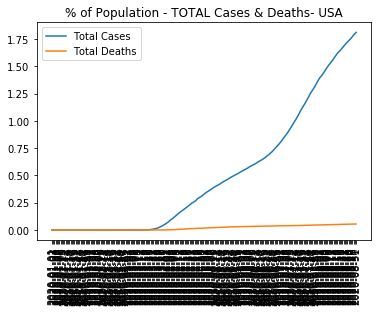

In [45]:
# Plot % of Population - TOTAL - USA
plt.plot(x_axis05, y_axis05, x_axis06, y_axis06)

plt.xticks(rotation=90)

plt.legend(["Total Cases", "Total Deaths"])

plt.title("% of Population - TOTAL Cases & Deaths- USA")

Text(0.5, 1.0, '% of Population - TOTAL Deaths- USA')

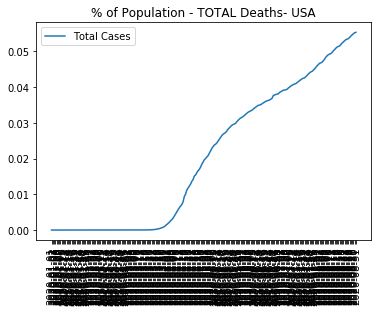

In [46]:
# Plot % of Population - TOTAL - USA
plt.plot(x_axis06, y_axis06)

plt.xticks(rotation=90)

plt.legend(["Total Cases", "Total Deaths"])

plt.title("% of Population - TOTAL Deaths- USA")

### Trying to capture total stats based on material changes in stringency index

In [47]:
# To track # days out - CANADA
canada_df["date_updated"] = pd.to_datetime(canada_df['date_updated'])
canada_df['7_days'] = canada_df['date_updated']+timedelta(days=7)
canada_df['14_days'] = canada_df['date_updated']+timedelta(days=14)
canada_df['30_days'] = canada_df['date_updated']+timedelta(days=30)
canada_df['60_days'] = canada_df['date_updated']+timedelta(days=60)

In [48]:
# Create date shifted DataFrames - CANADA
sub_total_updated = canada_df[["date_updated","location","total_tests_updated","total_cases_updated","total_deaths_updated"]]


sub_total_updated_7 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-07" ].reset_index()
sub_total_updated_7 = sub_total_updated_7.drop(["index"], axis=1)

sub_total_updated_14 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-14" ].reset_index()
sub_total_updated_14 = sub_total_updated_14.drop(["index"], axis=1)

sub_total_updated_30 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-30" ].reset_index()
sub_total_updated_30 = sub_total_updated_30.drop(["index"], axis=1)

sub_total_updated_60 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-02-29" ].reset_index()
sub_total_updated_60 = sub_total_updated_60.drop(["index"], axis=1)

In [49]:
# Add new columns for shifted results - CANADA
# 7 Days out...
canada_df["7_Days_Total_Tests"] = sub_total_updated_7["total_tests_updated"]
canada_df["7_Days_Total_Cases"] = sub_total_updated_7["total_cases_updated"]
canada_df["7_Days_Total_Deaths"] = sub_total_updated_7["total_deaths_updated"]

# 14 Days out...
canada_df["14_Days_Total_Tests"] = sub_total_updated_14["total_tests_updated"]
canada_df["14_Days_Total_Cases"] = sub_total_updated_14["total_cases_updated"]
canada_df["14_Days_Total_Deaths"] = sub_total_updated_14["total_deaths_updated"]

# 30 Days out...
canada_df["30_Days_Total_Tests"] = sub_total_updated_30["total_tests_updated"]
canada_df["30_Days_Total_Cases"] = sub_total_updated_30["total_cases_updated"]
canada_df["30_Days_Total_Deaths"] = sub_total_updated_30["total_deaths_updated"]

# 60 Days out...
canada_df["60_Days_Total_Tests"] = sub_total_updated_60["total_tests_updated"]
canada_df["60_Days_Total_Cases"] = sub_total_updated_60["total_cases_updated"]
canada_df["60_Days_Total_Deaths"] = sub_total_updated_60["total_deaths_updated"]

In [50]:
# In all shifter results columns, replace NaN with proceeding value - CANADA
canada_df_filled = canada_df.fillna(method="ffill")

In [51]:
# Add new columns for % change from shifter results - CANADA
# 7 Days out...
canada_df_filled["7_Days_Percentage_Change_Tests"] = ((canada_df_filled["7_Days_Total_Tests"]-canada_df_filled["total_tests_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["7_Days_Percentage_Change_Cases"] = ((canada_df_filled["7_Days_Total_Cases"]-canada_df_filled["total_cases_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["7_Days_Percentage_Change_Deaths"] = ((canada_df_filled["7_Days_Total_Deaths"]-canada_df_filled["total_deaths_updated"])/canada_df_filled["total_tests_updated"])*100

# 14 Days out...
canada_df_filled["14_Days_Percentage_Change_Tests"] = ((canada_df_filled["14_Days_Total_Tests"]-canada_df_filled["total_tests_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["14_Days_Percentage_Change_Cases"] = ((canada_df_filled["14_Days_Total_Cases"]-canada_df_filled["total_cases_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["14_Days_Percentage_Change_Deaths"] = ((canada_df_filled["14_Days_Total_Deaths"]-canada_df_filled["total_deaths_updated"])/canada_df_filled["total_tests_updated"])*100

# 30 Days out...
canada_df_filled["30_Days_Percentage_Change_Tests"] = ((canada_df_filled["30_Days_Total_Tests"]-canada_df_filled["total_tests_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["30_Days_Percentage_Change_Cases"] = ((canada_df_filled["30_Days_Total_Cases"]-canada_df_filled["total_cases_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["30_Days_Percentage_Change_Deaths"] = ((canada_df_filled["30_Days_Total_Deaths"]-canada_df_filled["total_deaths_updated"])/canada_df_filled["total_tests_updated"])*100

# 60 Days out...
canada_df_filled["60_Days_Percentage_Change_Tests"] = ((canada_df_filled["60_Days_Total_Tests"]-canada_df_filled["total_tests_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["60_Days_Percentage_Change_Cases"] = ((canada_df_filled["60_Days_Total_Cases"]-canada_df_filled["total_cases_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["60_Days_Percentage_Change_Deaths"] = ((canada_df_filled["60_Days_Total_Deaths"]-canada_df_filled["total_deaths_updated"])/canada_df_filled["total_tests_updated"])*100

In [52]:
# Filter for material percentage changes (>10% or <0%) - CANADA
new_canada_projection = canada_df_filled.loc[(canada_df.percentage_change_stringency > 10) | 
                                    (canada_df.percentage_change_stringency < 0)]

In [53]:
# Rearrange columns in logical order - CANADA
new_canada_projection = new_canada_projection[['date_updated', 
                                         'location', 
                                         'population',
                                         'StringencyIndex_updated',
                                         'new_tests', 
                                         'percentage_of_Pop_New_Tests',
                                         'total_tests_updated', 
                                         'percentage_of_Pop_Total_Tests',
                                         '7_Days_Total_Tests',
                                         '7_Days_Percentage_Change_Tests',
                                         '14_Days_Total_Tests', 
                                         '14_Days_Percentage_Change_Tests',
                                         '30_Days_Total_Tests',
                                         '30_Days_Percentage_Change_Tests',
                                         '60_Days_Total_Tests', 
                                         '60_Days_Percentage_Change_Tests',
                                         'new_cases', 
                                         'percentage_of_Pop_New_Cases',
                                         'total_cases_updated', 
                                         'percentage_of_Pop_Total_Cases',
                                         '7_Days_Total_Cases',
                                         '7_Days_Percentage_Change_Cases',
                                         '14_Days_Total_Cases',
                                         '14_Days_Percentage_Change_Cases',
                                         '30_Days_Total_Cases',
                                         '30_Days_Percentage_Change_Cases',
                                         '60_Days_Total_Cases',
                                         '60_Days_Percentage_Change_Cases',
                                         'new_deaths',
                                         'percentage_of_Pop_New_Deaths',
                                         'total_deaths_updated',
                                         'percentage_of_Pop_Total_Deaths',
                                         '7_Days_Total_Deaths',
                                         '7_Days_Percentage_Change_Deaths',
                                         '14_Days_Total_Deaths', 
                                         '14_Days_Percentage_Change_Deaths',
                                         '30_Days_Total_Deaths',
                                         '30_Days_Percentage_Change_Deaths',
                                         '60_Days_Total_Deaths', 
                                         '60_Days_Percentage_Change_Deaths'
                                        ]]

# Replace NaN with 0 
new_canada_projection.fillna(0, inplace=True)

# Replace inf with 0 
new_canada_projection.replace(np.inf, 0, inplace=True)

new_canada_projection

,date_updated,location,population,StringencyIndex_updated,new_tests,percentage_of_Pop_New_Tests,total_tests_updated,percentage_of_Pop_Total_Tests,7_Days_Total_Tests,7_Days_Percentage_Change_Tests,...,total_deaths_updated,percentage_of_Pop_Total_Deaths,7_Days_Total_Deaths,7_Days_Percentage_Change_Deaths,14_Days_Total_Deaths,14_Days_Percentage_Change_Deaths,30_Days_Total_Deaths,30_Days_Percentage_Change_Deaths,60_Days_Total_Deaths,60_Days_Percentage_Change_Deaths
70,2020-03-11,Canada,37742157,13.89,0,0.000000,0,0.000000,0.0,0.000000,...,1,0.000003,4.0,0.000000,24.0,0.000000,435.0,0.000000,4569.0,0.000000
71,2020-03-12,Canada,37742157,22.22,0,0.000000,0,0.000000,53975.0,0.000000,...,1,0.000003,8.0,0.000000,27.0,0.000000,509.0,0.000000,4693.0,0.000000
75,2020-03-16,Canada,37742157,43.52,0,0.000000,0,0.000000,98824.0,0.000000,...,1,0.000003,18.0,0.000000,60.0,0.000000,780.0,0.000000,5304.0,0.000000
77,2020-03-18,Canada,37742157,61.11,0,0.000000,53975,0.143010,125062.0,131.703566,...,8,0.000021,24.0,0.029643,89.0,0.150069,1010.0,1.856415,5562.0,10.289949
79,2020-03-20,Canada,37742157,71.30,21858,0.057914,76814,0.203523,161603.0,110.382222,...,10,0.000026,35.0,0.032546,109.0,0.128883,1309.0,1.691098,5782.0,7.514255
94,2020-04-04,Canada,37742157,72.69,16906,0.044793,311971,0.826585,383322.0,22.871036,...,187,0.000495,509.0,0.103215,1193.0,0.322466,3566.0,1.083113,7326.0,2.288354
131,2020-05-11,Canada,37742157,70.83,25722,0.068152,1118950,2.964722,1296695.0,15.884981,...,4871,0.012906,5679.0,0.072211,6355.0,0.132624,7835.0,0.264891,8737.0,0.345502
173,2020-06-22,Canada,37742157,68.98,32660,0.086535,2415365,6.399647,2640239.0,9.310146,...,8430,0.022336,8516.0,0.003561,8674.0,0.010102,8858.0,0.017720,9049.0,0.025628
190,2020-07-09,Canada,37742157,67.13,35169,0.093182,3055265,8.095099,3302407.0,8.089053,...,8737,0.023149,8798.0,0.001997,8862.0,0.004091,8966.0,0.007495,9117.0,0.012438
224,2020-08-12,Canada,37742157,64.35,36529,0.096786,4541747,12.033618,4840043.0,6.567869,...,8991,0.023822,9032.0,0.000903,9083.0,0.002026,9117.0,0.002774,9117.0,0.002774


In [54]:
# To track # days out - USA
usa_df["date_updated"] = pd.to_datetime(usa_df['date_updated'])
usa_df['7_days'] = usa_df['date_updated']+timedelta(days=7)
usa_df['14_days'] = usa_df['date_updated']+timedelta(days=14)
usa_df['30_days'] = usa_df['date_updated']+timedelta(days=30)
usa_df['60_days'] = usa_df['date_updated']+timedelta(days=60)

In [55]:
# Create date shifted DataFrames - USA
sub_total_updated = usa_df[["date_updated","location","total_tests_updated","total_cases_updated","total_deaths_updated"]]


sub_total_updated_7 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-07" ].reset_index()
sub_total_updated_7 = sub_total_updated_7.drop(["index"], axis=1)

sub_total_updated_14 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-14" ].reset_index()
sub_total_updated_14 = sub_total_updated_14.drop(["index"], axis=1)

sub_total_updated_30 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-30" ].reset_index()
sub_total_updated_30 = sub_total_updated_30.drop(["index"], axis=1)

sub_total_updated_60 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-02-29" ].reset_index()
sub_total_updated_60 = sub_total_updated_60.drop(["index"], axis=1)

In [56]:
# Add new columns for shifted results - USA
# 7 Days out...
usa_df["7_Days_Total_Tests"] = sub_total_updated_7["total_tests_updated"]
usa_df["7_Days_Total_Cases"] = sub_total_updated_7["total_cases_updated"]
usa_df["7_Days_Total_Deaths"] = sub_total_updated_7["total_deaths_updated"]

# 14 Days out...
usa_df["14_Days_Total_Tests"] = sub_total_updated_14["total_tests_updated"]
usa_df["14_Days_Total_Cases"] = sub_total_updated_14["total_cases_updated"]
usa_df["14_Days_Total_Deaths"] = sub_total_updated_14["total_deaths_updated"]

# 30 Days out...
usa_df["30_Days_Total_Tests"] = sub_total_updated_30["total_tests_updated"]
usa_df["30_Days_Total_Cases"] = sub_total_updated_30["total_cases_updated"]
usa_df["30_Days_Total_Deaths"] = sub_total_updated_30["total_deaths_updated"]

# 60 Days out...
usa_df["60_Days_Total_Tests"] = sub_total_updated_60["total_tests_updated"]
usa_df["60_Days_Total_Cases"] = sub_total_updated_60["total_cases_updated"]
usa_df["60_Days_Total_Deaths"] = sub_total_updated_60["total_deaths_updated"]

In [57]:
# In all shifter results columns, replace NaN with proceeding value - USA
usa_df_filled = usa_df.fillna(method="ffill")

In [58]:
# Add new columns for % change from shifter results - USA
# 7 Days out...
usa_df_filled["7_Days_Percentage_Change_Tests"] = ((usa_df_filled["7_Days_Total_Tests"]-usa_df_filled["total_tests_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["7_Days_Percentage_Change_Cases"] = ((usa_df_filled["7_Days_Total_Cases"]-usa_df_filled["total_cases_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["7_Days_Percentage_Change_Deaths"] = ((usa_df_filled["7_Days_Total_Deaths"]-usa_df_filled["total_deaths_updated"])/usa_df_filled["total_tests_updated"])*100

# 14 Days out...
usa_df_filled["14_Days_Percentage_Change_Tests"] = ((usa_df_filled["14_Days_Total_Tests"]-usa_df_filled["total_tests_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["14_Days_Percentage_Change_Cases"] = ((usa_df_filled["14_Days_Total_Cases"]-usa_df_filled["total_cases_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["14_Days_Percentage_Change_Deaths"] = ((usa_df_filled["14_Days_Total_Deaths"]-usa_df_filled["total_deaths_updated"])/usa_df_filled["total_tests_updated"])*100

# 30 Days out...
usa_df_filled["30_Days_Percentage_Change_Tests"] = ((usa_df_filled["30_Days_Total_Tests"]-usa_df_filled["total_tests_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["30_Days_Percentage_Change_Cases"] = ((usa_df_filled["30_Days_Total_Cases"]-usa_df_filled["total_cases_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["30_Days_Percentage_Change_Deaths"] = ((usa_df_filled["30_Days_Total_Deaths"]-usa_df_filled["total_deaths_updated"])/usa_df_filled["total_tests_updated"])*100

# 60 Days out...
usa_df_filled["60_Days_Percentage_Change_Tests"] = ((usa_df_filled["60_Days_Total_Tests"]-usa_df_filled["total_tests_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["60_Days_Percentage_Change_Cases"] = ((usa_df_filled["60_Days_Total_Cases"]-usa_df_filled["total_cases_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["60_Days_Percentage_Change_Deaths"] = ((usa_df_filled["60_Days_Total_Deaths"]-usa_df_filled["total_deaths_updated"])/usa_df_filled["total_tests_updated"])*100

In [59]:
# Filter for material percentage changes (>10% or <0%) - USA
new_usa_projection = usa_df_filled.loc[(usa_df.percentage_change_stringency > 10) | 
                                    (usa_df.percentage_change_stringency < 0)]

In [60]:
# Rearrange columns in logical order - USA
new_usa_projection = new_usa_projection[['date_updated', 
                                         'location', 
                                         'population',
                                         'StringencyIndex_updated',
                                         'new_tests', 
                                         'percentage_of_Pop_New_Tests',
                                         'total_tests_updated', 
                                         'percentage_of_Pop_Total_Tests',
                                         '7_Days_Total_Tests',
                                         '7_Days_Percentage_Change_Tests',
                                         '14_Days_Total_Tests', 
                                         '14_Days_Percentage_Change_Tests',
                                         '30_Days_Total_Tests',
                                         '30_Days_Percentage_Change_Tests',
                                         '60_Days_Total_Tests', 
                                         '60_Days_Percentage_Change_Tests',
                                         'new_cases', 
                                         'percentage_of_Pop_New_Cases',
                                         'total_cases_updated', 
                                         'percentage_of_Pop_Total_Cases',
                                         '7_Days_Total_Cases',
                                         '7_Days_Percentage_Change_Cases',
                                         '14_Days_Total_Cases',
                                         '14_Days_Percentage_Change_Cases',
                                         '30_Days_Total_Cases',
                                         '30_Days_Percentage_Change_Cases',
                                         '60_Days_Total_Cases',
                                         '60_Days_Percentage_Change_Cases',
                                         'new_deaths',
                                         'percentage_of_Pop_New_Deaths',
                                         'total_deaths_updated',
                                         'percentage_of_Pop_Total_Deaths',
                                         '7_Days_Total_Deaths',
                                         '7_Days_Percentage_Change_Deaths',
                                         '14_Days_Total_Deaths', 
                                         '14_Days_Percentage_Change_Deaths',
                                         '30_Days_Total_Deaths',
                                         '30_Days_Percentage_Change_Deaths',
                                         '60_Days_Total_Deaths', 
                                         '60_Days_Percentage_Change_Deaths'
                                        ]]

# Replace NaN with 0 
new_usa_projection.fillna(0, inplace=True)

# Replace inf with 0 
new_usa_projection.replace(np.inf, 0, inplace=True)

new_usa_projection

,date_updated,location,population,StringencyIndex_updated,new_tests,percentage_of_Pop_New_Tests,total_tests_updated,percentage_of_Pop_Total_Tests,7_Days_Total_Tests,7_Days_Percentage_Change_Tests,...,total_deaths_updated,percentage_of_Pop_Total_Deaths,7_Days_Total_Deaths,7_Days_Percentage_Change_Deaths,14_Days_Total_Deaths,14_Days_Percentage_Change_Deaths,30_Days_Total_Deaths,30_Days_Percentage_Change_Deaths,60_Days_Total_Deaths,60_Days_Percentage_Change_Deaths
60,2020-03-01,United States,331002647,8.33,132,0.000040,132,0.000040,6020.0,4460.606061,...,1,3.021124e-07,14.0,9.848485,47.0,34.848485,2509.0,1900.000000,58355.0,44207.575758
61,2020-03-02,United States,331002647,11.11,345,0.000104,477,0.000144,7448.0,1461.425577,...,2,6.042248e-07,17.0,3.144654,57.0,11.530398,3170.0,664.150943,60966.0,12780.712788
64,2020-03-05,United States,331002647,20.37,1119,0.000338,3217,0.000972,16015.0,397.824060,...,11,3.323236e-06,28.0,0.528443,108.0,3.015232,6053.0,187.814734,66385.0,2063.226609
71,2020-03-12,United States,331002647,30.09,6786,0.002050,22801,0.006888,157800.0,592.074909,...,30,9.063372e-06,108.0,0.342090,801.0,3.381431,16690.0,73.066971,78794.0,345.440989
73,2020-03-14,United States,331002647,35.65,10305,0.003113,42751,0.012916,281074.0,557.467662,...,47,1.419928e-05,150.0,0.240930,1296.0,2.921569,20608.0,48.094781,80684.0,188.620149
74,2020-03-15,United States,331002647,41.20,11777,0.003558,54528,0.016474,348587.0,539.280737,...,57,1.722041e-05,260.0,0.372286,1707.0,3.025968,22108.0,40.439774,82387.0,150.986649
75,2020-03-16,United States,331002647,52.31,22441,0.006780,76969,0.023253,410942.0,433.905858,...,69,2.084575e-05,340.0,0.352090,2191.0,2.756954,23649.0,30.635710,84133.0,109.217997
78,2020-03-19,United States,331002647,67.13,55633,0.016807,213433,0.064481,673352.0,215.486359,...,150,4.531686e-05,801.0,0.305014,4079.0,1.840859,33284.0,15.524310,88754.0,41.513730
166,2020-06-15,United States,331002647,68.98,558795,0.168819,26309869,7.948537,30134686.0,14.537575,...,115732,3.496407e-02,119719.0,0.015154,125539.0,0.037275,135605.0,0.075534,166027.0,0.191164
201,2020-07-20,United States,331002647,67.13,712174,0.215157,52189670,15.767146,57812429.0,10.773701,...,140534,4.245706e-02,146460.0,0.011355,154447.0,0.026659,170497.0,0.057412,183069.0,0.081501


### creating some graphs for analysis of material changes in index

In [61]:
new_canada_projection = new_canada_projection[[ 
                                         'date_updated',
                                         'total_cases_updated', 
                                         '7_Days_Total_Cases',
                                         '14_Days_Total_Cases',
                                         '30_Days_Total_Cases',
                                         '60_Days_Total_Cases'
                                         ]]
new_canada_projection = new_canada_projection.transpose().reset_index()

#grab the first row for the header
new_header = new_canada_projection.iloc[0]

#take the data less the header row
new_canada_projection = new_canada_projection[1:]

#set the header row as the df header
new_canada_projection.columns = new_header

new_canada_projection

,date_updated,2020-03-11 00:00:00,2020-03-12 00:00:00,2020-03-16 00:00:00,2020-03-18 00:00:00,2020-03-20 00:00:00,2020-04-04 00:00:00,2020-05-11 00:00:00,2020-06-22 00:00:00,2020-07-09 00:00:00,2020-08-12 00:00:00,2020-08-25 00:00:00
1,total_cases_updated,93,103,304,569,846,12519,68848,101326,106422,120406,125647
2,7_Days_Total_Cases,424,569,1302,1646,3385,20748,75853,103021,108475,122872,127940
3,14_Days_Total_Cases,1646,1959,5386,7424,9595,30081,83610,105305,111684,125647,127940
4,30_Days_Total_Cases,19274,20748,25663,28364,31872,56714,96233,111113,118546,127940,127940
5,60_Days_Total_Cases,66434,67702,72278,74602,76991,91694,106422,123490,127940,127940,127940


In [62]:
# Set the axis - CANADA
x_axis1 = new_canada_projection["date_updated"]
y_axis1 = new_canada_projection.iloc[ : ,1]

x_axis2 = new_canada_projection["date_updated"]
y_axis2 = new_canada_projection.iloc[ : ,2]

x_axis3 = new_canada_projection["date_updated"]
y_axis3 = new_canada_projection.iloc[ : ,3]

x_axis4 = new_canada_projection["date_updated"]
y_axis4 = new_canada_projection.iloc[ : ,4]

x_axis5 = new_canada_projection["date_updated"]
y_axis5 = new_canada_projection.iloc[ : ,5]

x_axis6 = new_canada_projection["date_updated"]
y_axis6 = new_canada_projection.iloc[ : ,6]

x_axis7 = new_canada_projection["date_updated"]
y_axis7 = new_canada_projection.iloc[ : ,7]

x_axis8 = new_canada_projection["date_updated"]
y_axis8 = new_canada_projection.iloc[ : ,8]

x_axis9 = new_canada_projection["date_updated"]
y_axis9 = new_canada_projection.iloc[ : ,9]

x_axis10 = new_canada_projection["date_updated"]
y_axis10 = new_canada_projection.iloc[ : ,10]

# x_axis11 = new_canada_projection["date_updated"]
# y_axis11 = new_canada_projection.iloc[ : ,11]

# x_axis12 = new_canada_projection["date_updated"]
# y_axis12 = new_canada_projection.iloc[ : ,12]


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

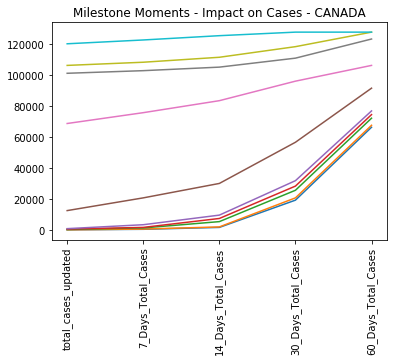

In [63]:
# Plot amounts for cases, at intervals - CANADA
p1 = plt.plot(x_axis1 , y_axis1)
p2 = plt.plot(x_axis2 , y_axis2)
p3 = plt.plot(x_axis3 , y_axis3)
p4 = plt.plot(x_axis4 , y_axis4)
p5 = plt.plot(x_axis5 , y_axis5)
p1 = plt.plot(x_axis6 , y_axis6)
p1 = plt.plot(x_axis7 , y_axis7)
p1 = plt.plot(x_axis8 , y_axis8)
p1 = plt.plot(x_axis9 , y_axis9)
p1 = plt.plot(x_axis10 , y_axis10)
# p1 = plt.plot(x_axis11 , y_axis11)
# p1 = plt.plot(x_axis12 , y_axis12)
plt.title("Milestone Moments - Impact on Cases - CANADA")

plt.xticks(rotation=90)

In [64]:
new_usa_projection = new_usa_projection[[ 
                                         'date_updated',
                                         'total_cases_updated', 
                                         '7_Days_Total_Cases',
                                         '14_Days_Total_Cases',
                                         '30_Days_Total_Cases',
                                         '60_Days_Total_Cases'
                                         ]]
new_usa_projection = new_usa_projection.transpose().reset_index()

#grab the first row for the header
new_header = new_usa_projection.iloc[0]

#take the data less the header row
new_usa_projection = new_usa_projection[1:]

#set the header row as the df header
new_usa_projection.columns = new_header

new_usa_projection

,date_updated,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-05 00:00:00,2020-03-12 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-19 00:00:00,2020-06-15 00:00:00,2020-07-20 00:00:00
1,total_cases_updated,69,89,159,1312,2174,2951,3774,9415,2094069,3773260
2,7_Days_Total_Cases,338,433,1025,6427,14250,19624,26747,55231,2.25512e+06,4.17803e+06
3,14_Days_Total_Cases,2174,2951,6427,55231,85991,104686,124665,189618,2.51032e+06,4.62044e+06
4,30_Days_Total_Cases,143025,164620,245540,466033,529951,557571,582594,671331,3.36306e+06,5.43832e+06
5,60_Days_Total_Cases,1.01258e+06,1.03991e+06,1.13307e+06,1.30954e+06,1.34792e+06,1.36996e+06,1.39075e+06,1.46788e+06,5.19715e+06,5.99716e+06


In [65]:
# Set the axis - USA
x_axis1 = new_usa_projection["date_updated"]
y_axis1 = new_usa_projection.iloc[ : ,1]

x_axis2 = new_usa_projection["date_updated"]
y_axis2 = new_usa_projection.iloc[ : ,2]

x_axis3 = new_usa_projection["date_updated"]
y_axis3 = new_usa_projection.iloc[ : ,3]

x_axis4 = new_usa_projection["date_updated"]
y_axis4 = new_usa_projection.iloc[ : ,4]

x_axis5 = new_usa_projection["date_updated"]
y_axis5 = new_usa_projection.iloc[ : ,5]

x_axis6 = new_usa_projection["date_updated"]
y_axis6 = new_usa_projection.iloc[ : ,6]

x_axis7 = new_usa_projection["date_updated"]
y_axis7 = new_usa_projection.iloc[ : ,7]

x_axis8 = new_usa_projection["date_updated"]
y_axis8 = new_usa_projection.iloc[ : ,8]

x_axis9 = new_usa_projection["date_updated"]
y_axis9 = new_usa_projection.iloc[ : ,9]

x_axis10 = new_usa_projection["date_updated"]
y_axis10 = new_usa_projection.iloc[ : ,10]


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

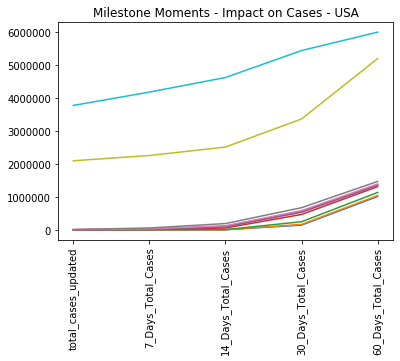

In [66]:
# Plot amounts for cases, at intervals - USA
p1 = plt.plot(x_axis1 , y_axis1)
p2 = plt.plot(x_axis2 , y_axis2)
p3 = plt.plot(x_axis3 , y_axis3)
p4 = plt.plot(x_axis4 , y_axis4)
p5 = plt.plot(x_axis5 , y_axis5)
p1 = plt.plot(x_axis6 , y_axis6)
p1 = plt.plot(x_axis7 , y_axis7)
p1 = plt.plot(x_axis8 , y_axis8)
p1 = plt.plot(x_axis9 , y_axis9)
p1 = plt.plot(x_axis10 , y_axis10)
plt.title("Milestone Moments - Impact on Cases - USA")

plt.xticks(rotation=90)